In [1]:
## Import
import pandas as pd
import json
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
## Load data
#df = pd.read_csv("../political_vote_classifiers/votes_scored_v2_1_utf.csv").drop(columns=["Unnamed: 0"]).rename(columns={"description":"text"})
df = pd.read_csv("../political_vote_classifiers/votes_scored_v2_1_utf.csv").drop(columns=["Unnamed: 0"]).rename(columns={"description":"text"})

In [3]:
df['date'] = pd.to_datetime(df['date'])

In [4]:
df['climate'] = df['y_pred'].apply(lambda x: 1 if x=="climate" else 0)
df['non-climate'] = df['y_pred'].apply(lambda x: 1 if x=="non-climate" else 0)

In [5]:
len(df[(df['text'].str.contains("covid")) & (df['y_pred']=='climate')])

30

## Temporal analysis

In [6]:
quarterly = df.groupby(df['date'].dt.to_period('Q')).agg({'climate': 'sum', 'non-climate':'sum'})
quarterly['percentage_climate'] = quarterly.apply(lambda x: (x['climate']/(x['climate']+x['non-climate']))*100, axis=1)

view = pd.DataFrame(quarterly.drop(columns=['climate', 'non-climate']))

In [49]:
view["date2"] = view.index.astype(str)
viewQ = view[(view["date2"].str.endswith("Q1"))|(view["date2"].str.endswith("Q2"))|(view["date2"].str.endswith("Q4"))].drop(columns=["date2"])
#view

In [76]:
yearly = df.groupby(df['date'].dt.to_period('Y')).agg({'climate': 'sum', 'non-climate':'sum'})
yearly['percentage_climate'] = yearly.apply(lambda x: (x['climate']/(x['climate']+x['non-climate']))*100, axis=1)

view2 = yearly.drop(columns=['climate', 'non-climate'])

## Comment out to get from 2012 ->
view2["date2"] = view2.index.astype(int) ## wierd stuff... 2012 = 42 in this
view2 = view2[view2["date2"]>=42].drop(columns=['date2'])

C:\Users\COBOD\AppData\Local\Temp/ipykernel_14064/1701748752.py:7: FutureWarning: casting period[A-DEC] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  view2["date2"] = view2.index.astype(int) ## wierd stuff... 2012 = 42 in this


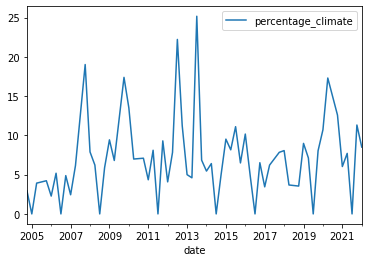

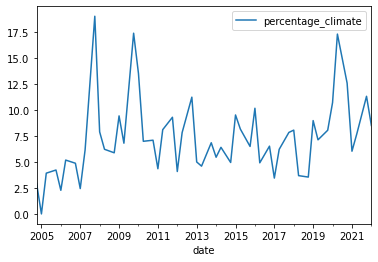

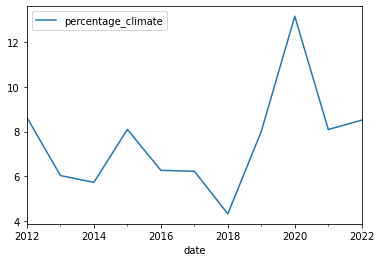

In [77]:
view.plot()
viewQ.plot()
view2.plot()
plt.show()

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#view

In [79]:

x = range(len(view2))
y = view2["percentage_climate"].values


In [80]:
y

array([ 8.62619808,  6.03825137,  5.73248408,  8.09716599,  6.26865672,
        6.23145401,  4.32569975,  8.01217039, 13.14741036,  8.09409888,
        8.5106383 ])

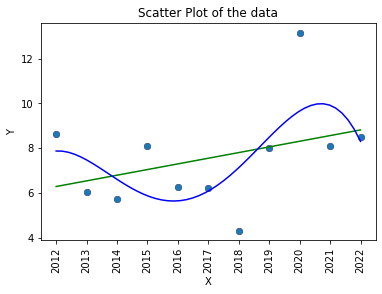

In [89]:

model1 = np.poly1d(np.polyfit(x, y, 1))
model2 = np.poly1d(np.polyfit(x, y, 2))
model3 = np.poly1d(np.polyfit(x, y, 3))
model4 = np.poly1d(np.polyfit(x, y, 4))
model5 = np.poly1d(np.polyfit(x, y, 5))

plt.scatter(x,y,color="red")
plt.title("Scatter Plot of the data")
plt.xlabel("X")
plt.ylabel("Y")

#create scatterplot
polyline = np.linspace(0, 10, 50)
plt.scatter(x, y)

#add fitted polynomial lines to scatterplot 
plt.plot(polyline, model1(polyline), color='green')
#plt.plot(polyline, model2(polyline), color='red')
#plt.plot(polyline, model3(polyline), color='purple')
plt.plot(polyline, model4(polyline), color='blue')
#plt.plot(polyline, model5(polyline), color='orange')
plt.xticks(x, view2.index, rotation ='vertical')
plt.show()

In [171]:
## 2012-2022
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_2012 = df[df["date"]>='2012-01-01']
#df_2012

In [172]:

yearly2 = df_2012.groupby(df_2012['date'].dt.to_period('Y')).agg({'climate': 'sum', 'non-climate':'sum'})
yearly2['percentage_climate'] = yearly2.apply(lambda x: (x['climate']/(x['climate']+x['non-climate']))*100, axis=1)

view2012 = pd.DataFrame(yearly2.drop(columns=['climate', 'non-climate']))
view2012

,percentage_climate
date,
2012,8.626198
2013,6.038251
2014,5.732484
2015,8.097166
2016,6.268657
2017,6.231454
2018,4.325700
2019,8.012170
2020,13.147410


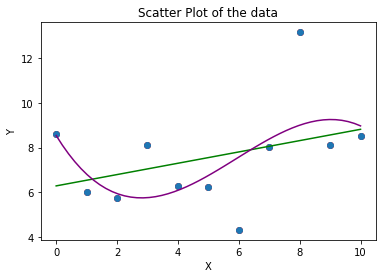

In [173]:
x = range(len(view2012))
y = view2012["percentage_climate"].values

model1 = np.poly1d(np.polyfit(x, y, 1))
model2 = np.poly1d(np.polyfit(x, y, 2))
model3 = np.poly1d(np.polyfit(x, y, 3))
model4 = np.poly1d(np.polyfit(x, y, 4))
model5 = np.poly1d(np.polyfit(x, y, 5))

plt.scatter(x,y,color="red")
plt.title("Scatter Plot of the data")
plt.xlabel("X")
plt.ylabel("Y")

#create scatterplot
polyline = np.linspace(0, 10, 50)
plt.scatter(x, y)

#add fitted polynomial lines to scatterplot 
plt.plot(polyline, model1(polyline), color='green')
#plt.plot(polyline, model2(polyline), color='red')
plt.plot(polyline, model3(polyline), color='purple')
#plt.plot(polyline, model4(polyline), color='blue')
#plt.plot(polyline, model5(polyline), color='orange')
plt.show()

## Consensus and "pro"

In [90]:
df.sample(3).head(3)

,Absent,Against,For,Neutral,parties,text,y_pred,date,climate,non-climate
2459,6,0,1,0,Uden for folketingsgrupperne (UFG),Lovforslaget vil sikre personer fra Færøerne o...,non-climate,2021-06-08,0,1
25621,15,22,0,0,Dansk Folkeparti (DF),"Beslutningsforslaget indebærer, at der skal ne...",non-climate,2016-06-02,0,1
52858,8,0,17,0,Dansk Folkeparti (DF),"Med loven oprettes en ordning, som kan underst...",non-climate,2008-06-17,0,1


In [91]:
parties_selection = ["Socialdemokratiet (S)", "Venstre (V)", "Socialistisk Folkeparti (SF)", "Det Konservative Folkeparti (KF)", "Dansk Folkeparti (DF)", "Enhedslisten (EL)"
                    ,"Det Radikale Venstre (RV)", "Alternativet (ALT)", "Liberal Alliance (LA)"]
print(len(df))
df_selection = df[df["parties"].isin(parties_selection)]
df_selection
print(len(df_selection))
df_selection

70812
44494


,Absent,Against,For,Neutral,parties,text,y_pred,date,climate,non-climate
0,18,31,0,0,Socialdemokratiet (S),Forslaget går ud på at lovfæste klippekortordn...,non-climate,2022-03-15,0,1
1,12,0,0,27,Venstre (V),Forslaget går ud på at lovfæste klippekortordn...,non-climate,2022-03-15,0,1
2,6,9,0,0,Socialistisk Folkeparti (SF),Forslaget går ud på at lovfæste klippekortordn...,non-climate,2022-03-15,0,1
3,4,10,0,0,Det Radikale Venstre (RV),Forslaget går ud på at lovfæste klippekortordn...,non-climate,2022-03-15,0,1
4,5,8,0,0,Enhedslisten (EL),Forslaget går ud på at lovfæste klippekortordn...,non-climate,2022-03-15,0,1
...,...,...,...,...,...,...,...,...,...,...
70802,22,0,0,0,Dansk Folkeparti (DF),Baggrund:,climate,2004-12-07,1,0
70803,16,0,0,0,Det Konservative Folkeparti (KF),Baggrund:,climate,2004-12-07,1,0
70804,11,0,1,0,Socialistisk Folkeparti (SF),Baggrund:,climate,2004-12-07,1,0
70805,9,0,0,0,Det Radikale Venstre (RV),Baggrund:,climate,2004-12-07,1,0


In [92]:
df_agree = df_selection.groupby(["parties","climate"]).sum()[["For", "Neutral", "Against", "Absent"]]
df_agree

df_agree["Total"] = df_agree["For"]+df_agree["Against"]+df_agree["Neutral"]
df_agree["Agree"] = df_agree["For"]/df_agree["Total"]
df_agree["Neutrality"] = df_agree["Neutral"]/df_agree["Total"]
df_agree["Disagree"] = df_agree["Against"]/df_agree["Total"]
df_agree["Absence"] = df_agree["Absent"]/df_agree["Total"]
df_agree

For  Neutral  Against  Absent  \
parties                          climate                                     
Alternativet (ALT)               0          5193      243     2792    5521   
                                 1           357       21      191     358   
Dansk Folkeparti (DF)            0         60988     1623    18482   47570   
                                 1          4177      135     1512    3480   
Det Konservative Folkeparti (KF) 0         27715      130     8926   23262   
                                 1          2035       10      695    1811   
Det Radikale Venstre (RV)        0         25193      844    10102   26988   
                                 1          2014      126      571    2054   
Enhedslisten (EL)                0         17177     1015    11160   20387   
                                 1          1506       79      629    1570   
Liberal Alliance (LA)            0         11767      277     5415   12831   
                                 1           723       15      533     948   
Socialdemokratiet (S)            0        101892     3017    39713   89081   
                                 1          7683      750     2332    6795   
Socialistisk Folkeparti (SF)     0         29883     1645    11789   26387   
                                 1          2465      305      674    2137   
Venstre (V)                      0         99917     1234    34158   84425   
                                 1          7286       29     2656    6472   

                                           Total     Agree  Neutrality  \
parties                          climate                                 
Alternativet (ALT)               0          8228  0.631138    0.029533   
                                 1           569  0.627417    0.036907   
Dansk Folkeparti (DF)            0         81093  0.752075    0.020014   
                                 1          5824  0.717205    0.023180   
Det Konservative Folkeparti (KF) 0         36771  0.753719    0.003535   
                                 1          2740  0.742701    0.003650   
Det Radikale Venstre (RV)        0         36139  0.697114    0.023354   
                                 1          2711  0.742899    0.046477   
Enhedslisten (EL)                0         29352  0.585207    0.034580   
                                 1          2214  0.680217    0.035682   
Liberal Alliance (LA)            0         17459  0.673979    0.015866   
                                 1          1271  0.568843    0.011802   
Socialdemokratiet (S)            0        144622  0.704540    0.020861   
                                 1         10765  0.713702    0.069670   
Socialistisk Folkeparti (SF)     0         43317  0.689868    0.037976   
                                 1          3444  0.715738    0.088560   
Venstre (V)                      0        135309  0.738436    0.009120   
                                 1          9971  0.730719    0.002908   

                                          Disagree   Absence  
parties                          climate                      
Alternativet (ALT)               0        0.339329  0.671001  
                                 1        0.335677  0.629174  
Dansk Folkeparti (DF)            0        0.227911  0.586610  
                                 1        0.259615  0.597527  
Det Konservative Folkeparti (KF) 0        0.242746  0.632618  
                                 1        0.253650  0.660949  
Det Radikale Venstre (RV)        0        0.279532  0.746783  
                                 1        0.210623  0.757654  
Enhedslisten (EL)                0        0.380213  0.694569  
                                 1        0.284101  0.709124  
Liberal Alliance (LA)            0        0.310155  0.734922  
                                 1        0.419355  0.745869  
Socialdemokratiet (S)            0        0.274599  0.615957  
                                 1        0.216628  0.6312

In [93]:
df_agree_all = df_agree[["For", "Neutral", "Against", "Absent"]]
df_agree_all = df_agree_all.groupby("climate").sum()

df_agree_all["Total"] = df_agree_all["For"]+df_agree_all["Against"]+df_agree_all["Neutral"]
df_agree_all["Agree"] = df_agree_all["For"]/df_agree_all["Total"]
df_agree_all["Neutrality"] = df_agree_all["Neutral"]/df_agree_all["Total"]
df_agree_all["Disagree"] = df_agree_all["Against"]/df_agree_all["Total"]
df_agree_all["Absence"] = df_agree_all["Absent"]/df_agree_all["Total"]
df_agree_all

,For,Neutral,Against,Absent,Total,Agree,Neutrality,Disagree,Absence
climate,,,,,,,,,
0,379725,10028,142537,336452,532290,0.713380,0.018839,0.267781,0.632084
1,28246,1470,9793,25625,39509,0.714926,0.037207,0.247868,0.648586


In [94]:
df_agree[["Agree", "Neutrality", "Disagree", "Absence"]].describe()

,Agree,Neutrality,Disagree,Absence
count,18.000000,18.000000,18.000000,18.000000
mean,0.692529,0.028538,0.278934,0.662036
std,0.055835,0.022713,0.058996,0.055853
min,0.568843,0.002908,0.195703,0.586610
25%,0.675538,0.012818,0.245170,0.621360
50%,0.709121,0.023267,0.269264,0.640850
75%,0.736507,0.036601,0.303642,0.705485
max,0.753719,0.088560,0.419355,0.757654


<AxesSubplot:>

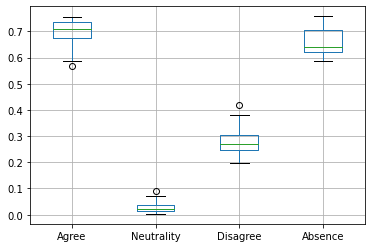

In [97]:
df_agree[["Agree", "Neutrality", "Disagree", "Absence"]].boxplot()